In [24]:
import pandas as pd

In [25]:
from sklearn.manifold import TSNE

In [98]:
import numpy as np
%matplotlib inline

In [27]:
import cell
import imp
from cell import Celltype_utils, utils, plot_utils ,math_utils

imp.reload(math_utils)
imp.reload(cell)
imp.reload(utils)
imp.reload(Celltype_utils)
imp.reload(plot_utils)

<module 'cell.plot_utils' from '/Users/fahimehb/Documents/git-workspace/celltypes/cell/plot_utils.py'>

In [28]:
project_dir = "/Users/fahimehb/Documents/git-workspace/ohmnet/"
dat_dir = project_dir + "/data"
output_dir = project_dir + "/output_128d"

edgelist_dir = dat_dir + "/edgelists/"
ndim = 128

### All different regions and edgelist in each layer of hirerarchy

In [29]:
regions = ["cerebellum", "temporal_lobe", "parietal_lobe", "occipital_lobe", "frontal_lobe", 
             "midbrain", "substantia_nigra", "pons",  "medulla_oblongata"]

In [30]:
region_colors = ["#E826FF", "#91910E", "#FF9900", "#CC322E", "#C0F27F",
                "#3749D3", "#00FFFF","#8059FF", "#FF2D41"]

In [31]:
edgelist = {}

for region in regions:
    edgelist[region] = pd.read_csv(edgelist_dir + region + ".edgelist", sep = "\t", header= None)
    edgelist[region].columns = ["node1", "node2"]

Estimating number of nodes in each layer of hierarchy. The correct number of nodes should be identified later and can not be done using the 

In [32]:
total_n_nodes = 0

for region in regions:
    combine_two_edge_cols = edgelist[region]['node1'].append(edgelist[region]['node2'], ignore_index=True)
    n_nodes = len(np.unique(combine_two_edge_cols))
    total_n_nodes = total_n_nodes + n_nodes
    print(region, "#nodes:", n_nodes)
    print("-------------")    
print("Total number of nodes:", total_n_nodes)

cerebellum #nodes: 2608
-------------
temporal_lobe #nodes: 2570
-------------
parietal_lobe #nodes: 754
-------------
occipital_lobe #nodes: 1845
-------------
frontal_lobe #nodes: 1952
-------------
midbrain #nodes: 2310
-------------
substantia_nigra #nodes: 2308
-------------
pons #nodes: 810
-------------
medulla_oblongata #nodes: 1828
-------------
Total number of nodes: 16985


In [11]:
nodes = {}
for region in regions:
    combine_two_edge_cols = edgelist[region]['node1'].append(edgelist[region]['node2'], ignore_index=True)
    nodes[region] = np.unique(combine_two_edge_cols).tolist()

### Find common node ids which are shared in different layers

In [12]:
d = [nodes[i] for i in regions]
common_nodes = list(set(d[0]).intersection(*d))
len(common_nodes)

535

In [33]:
output_dir

'/Users/fahimehb/Documents/git-workspace/ohmnet//output_128d'

### Read embedding at the leaf nodes


In [37]:
leaf_vectors = pd.read_csv(output_dir + "/leaf_vectors.emb", sep = " ").reset_index()
leaf_vectors = leaf_vectors.set_index("level_0")
leaf_vectors.columns = ["d" + str(i) for i in range(ndim)]
leaf_vectors = utils.Reset_Rename_index(leaf_vectors, name = "layer_id", index_col_name= "level_0")

In [38]:
for region in regions :
    leaf_vectors["layer_id"] = leaf_vectors["layer_id"].str.replace('data_edgelists_'+ region +'.edgelist', region, regex=True)
leaf_vectors[["layer_id", "node_id"]] = leaf_vectors["layer_id"].str.split("__", expand = True)

In [39]:
ref_cl = pd.DataFrame({"layer_id" : regions, "layer_color":region_colors})

In [40]:
leaf_vectors = leaf_vectors.merge(ref_cl, on= "layer_id")

In [41]:
leaf_vectors.head()

,layer_id,d0,d1,d2,d3,d4,d5,d6,d7,d8,...,d120,d121,d122,d123,d124,d125,d126,d127,node_id,layer_color
0,temporal_lobe,0.115983,-0.079629,0.011503,-0.029386,-0.004567,0.113031,-0.107122,0.058155,0.221665,...,0.075431,-0.046502,-0.061196,0.110317,-0.066275,0.006364,0.063849,-0.066240,1994,#91910E
1,temporal_lobe,0.235528,-0.180296,0.014291,-0.075423,-0.014327,0.253761,-0.230195,0.139692,0.510934,...,0.178597,-0.100201,-0.129337,0.229591,-0.145749,0.024001,0.126974,-0.148211,351,#91910E
2,temporal_lobe,0.163612,-0.118258,0.011048,-0.045311,-0.010385,0.166779,-0.155836,0.088904,0.332853,...,0.116083,-0.069624,-0.087303,0.157706,-0.099258,0.012356,0.089003,-0.098313,7157,#91910E
3,temporal_lobe,0.112968,-0.083422,0.007792,-0.034323,-0.005564,0.117284,-0.106892,0.059892,0.232276,...,0.078374,-0.047655,-0.061200,0.110258,-0.069326,0.008851,0.063380,-0.066385,7514,#91910E
4,temporal_lobe,0.236563,-0.180644,0.011321,-0.075883,-0.014009,0.249412,-0.229250,0.141593,0.519976,...,0.186043,-0.102265,-0.125566,0.231771,-0.148984,0.027433,0.125919,-0.154201,2885,#91910E


In [42]:
leaf_vectors.shape

(16897, 131)

Number of nodes in each layer

In [43]:
leaf_vectors['layer_id'].value_counts()

cerebellum           2597
temporal_lobe        2558
midbrain             2300
substantia_nigra     2298
frontal_lobe         1943
occipital_lobe       1835
medulla_oblongata    1819
pons                  804
parietal_lobe         743
Name: layer_id, dtype: int64

In [24]:
common_nodes = [str(i) for i in common_nodes]

In [44]:
colors = pd.read_csv("/Volumes/Fahimehb/GNN/dat/ref_color.csv", index_col="Unnamed: 0")['cluster_color']

In [45]:
select_nodes = pd.DataFrame({"node_id" : common_nodes[0:len(colors)], "node_color": colors})

In [47]:
#leaf_vectors = leaf_vectors.merge(select_nodes)

### Plot 2D embedding

I ran a 2d embedding and looked at the embedding of the 500 common nodes between layers

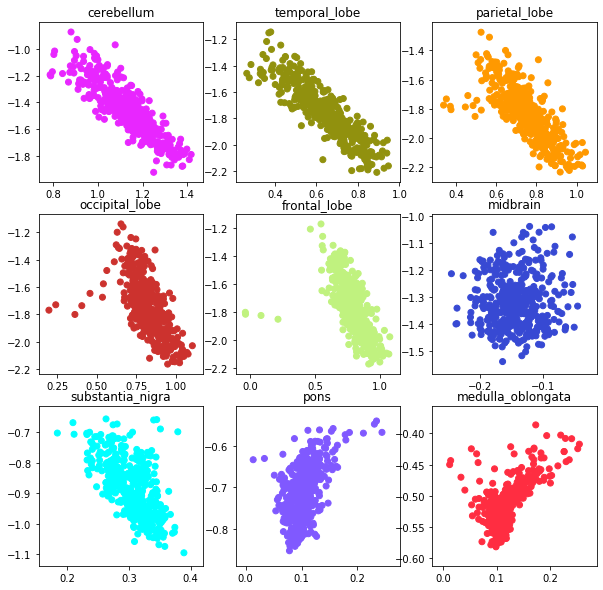

In [28]:
plt.figure(figsize=(10,10))

for i, region in enumerate(regions):
    plt.subplot(3, 3, i+1)
    
    df = leaf_vectors[leaf_vectors["node_id"].isin(select_nodes['node_id'])]
    df = df[df['layer_id'] == region]
    
    plt.scatter(df["d0"], 
            df["d1"], 
            c= df['layer_color'])
    plt.title(region)
    
plt.show()

Here I tried to look at the same set of nodes and color them to see how their relative embedding changes in different layers

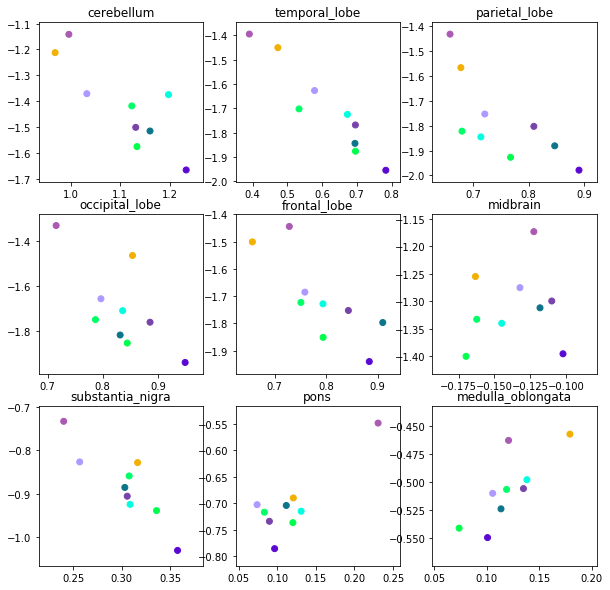

In [104]:
plt.figure(figsize=(10,10))

for i, region in enumerate(regions):
    plt.subplot(3, 3, i+1)
    
    df = leaf_vectors[leaf_vectors["node_id"].isin(select_nodes['node_id'][0:15000:50])]
    df = df[df['layer_id'] == region]
    
    plt.scatter(df["d0"], 
            df["d1"], 
            c= df['node_color'])
    plt.title(region)
    
plt.show()

### Plot 2D TSNE

In [21]:
datasets = {}
datasets_colors = {}
datasets_legends = {}

for region in regions:
    datasets[region] = leaf_vectors[leaf_vectors['layer_id'] == region].rename(columns = {"d0": "x", "d1":"y"})
    datasets_colors[region] = ref_cl[ref_cl['layer_id'] == region]["layer_color"].values[0]
    datasets_legends[region] = region


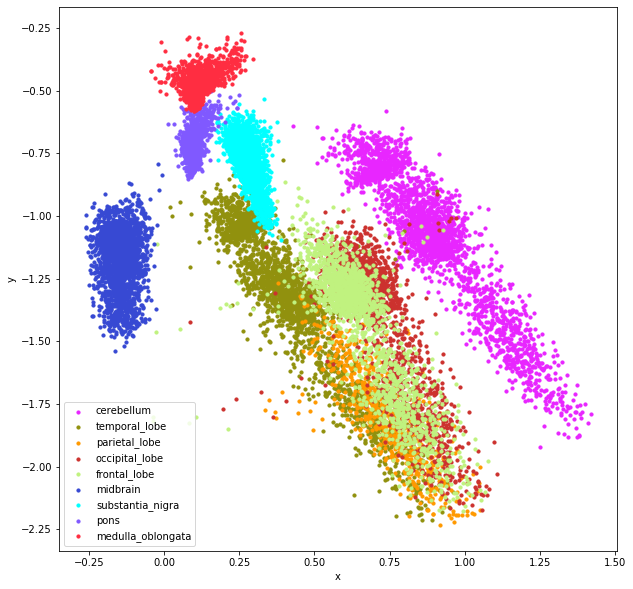

In [22]:
fig = plot_utils.Scatter_plot(datasets, datasets_colors, datasets_legends, plot_line = False, legend_loc = "lower left")

### Internal node embeddings

In [103]:
leaf_vectors['layer_id'].value_counts()

cerebellum           2597
temporal_lobe        2558
midbrain             2300
substantia_nigra     2298
frontal_lobe         1943
occipital_lobe       1835
medulla_oblongata    1819
pons                  804
parietal_lobe         743
Name: layer_id, dtype: int64

In [30]:
internal_vectors = pd.read_csv(output_dir + "/internal_vectors.emb", sep = " ").reset_index()
internal_vectors = internal_vectors.set_index("index")
internal_vectors.columns = ["d" + str(i) for i in range(ndim)]
internal_vectors = utils.Reset_Rename_index(internal_vectors, name = "layer_id", index_col_name= "index")
internal_vectors.head()

,layer_id,d0,d1
0,brain_NODE__11104,0.432744,-0.972168
1,brain_NODE__4094,0.451971,-0.952817
2,brain_NODE__10892,0.736106,-1.630892
3,brain_NODE__861,0.513962,-1.018153
4,brain_NODE__8775,0.692225,-1.541498


In [31]:
internal_vectors[["hierarchy_elemenet_node_id", "node_id"]] = internal_vectors["layer_id"].str.split("__", expand= True)

In [32]:
internal_vectors.head()

,layer_id,d0,d1,hierarchy_elemenet_node_id,node_id
0,brain_NODE__11104,0.432744,-0.972168,brain_NODE,11104
1,brain_NODE__4094,0.451971,-0.952817,brain_NODE,4094
2,brain_NODE__10892,0.736106,-1.630892,brain_NODE,10892
3,brain_NODE__861,0.513962,-1.018153,brain_NODE,861
4,brain_NODE__8775,0.692225,-1.541498,brain_NODE,8775


In [33]:
internal_vectors['hierarchy_elemenet_node_id'].value_counts()

brain_stem_NODE    2702
brain_NODE         2702
Name: hierarchy_elemenet_node_id, dtype: int64

In [34]:
nodes_of_brain_NODE = internal_vectors[internal_vectors['hierarchy_elemenet_node_id'] == "brain_NODE"]['node_id'].tolist()
nodes_of_brainstem_NODE = internal_vectors[internal_vectors['hierarchy_elemenet_node_id'] == "brain_stem_NODE"]['node_id'].tolist()

In [35]:
d = [nodes_of_brain_NODE, nodes_of_brainstem_NODE]
len(list(set(d[0]).intersection(*d)))

2702

In [36]:
ref_cl

,layer_id,layer_color
0,cerebellum,#E826FF
1,temporal_lobe,#91910E
2,parietal_lobe,#FF9900
3,occipital_lobe,#CC322E
4,frontal_lobe,#C0F27F
5,midbrain,#3749D3
6,substantia_nigra,#00FFFF
7,pons,#8059FF
8,medulla_oblongata,#FF2D41


In [ ]:
plt.figure(figsize=(10,10))

for i, region in enumerate(regions):
    plt.subplot(3, 3, i+1)
    
    df = leaf_vectors[leaf_vectors["node_id"].isin(select_nodes['node_id'][0:15000:50])]
    df = df[df['layer_id'] == region]
    
    plt.scatter(df["d0"], 
            df["d1"], 
            c= df['node_color'])
    plt.title(region)
    
plt.show()

## 128 dimensional run and TSNE

In [101]:
df = leaf_vectors
colors = df['layer_color']
tsne = TSNE(n_components=2 , random_state=42)
node_embeddings_2d = tsne.fit_transform(df.loc[:,"d0":"d127"])

In [112]:
df = pd.DataFrame(node_embeddings_2d).rename(columns = {0: "x", 1:"y"})
df[['layer_id', 'layer_color']] = leaf_vectors[['layer_id', "layer_color"]]

In [113]:
datasets = {}
datasets_colors = {}
datasets_legends = {}

for region in regions:
    datasets[region] = df[df['layer_id'] == region].rename(columns = {"d0": "x", "d1":"y"})
    datasets_colors[region] = ref_cl[ref_cl['layer_id'] == region]["layer_color"].values[0]
    datasets_legends[region] = region

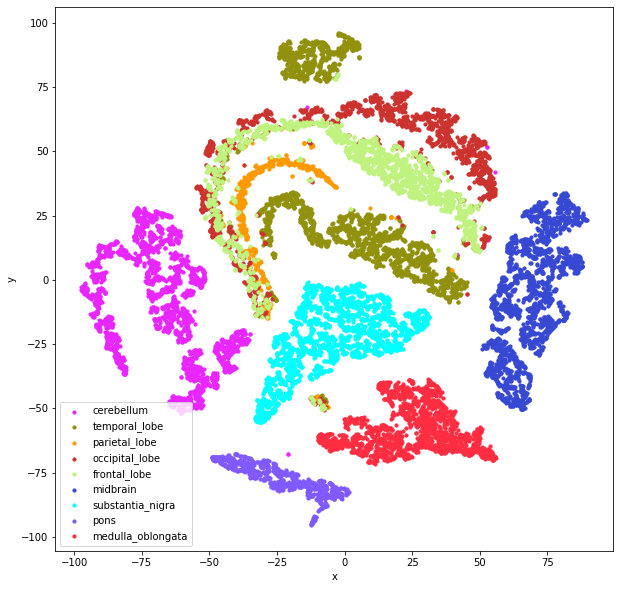

In [116]:
fig = plot_utils.Scatter_plot(datasets, datasets_colors, datasets_legends, plot_line = False, legend_loc = "lower left")
fig.savefig(output_dir + "/emd.png")

Plotting the results of only 500 common nodes between layers, using 128 dim and then TSNE

In [86]:
d = [nodes[i] for i in regions]
common_nodes = list(set(d[0]).intersection(*d))
len(common_nodes)

535

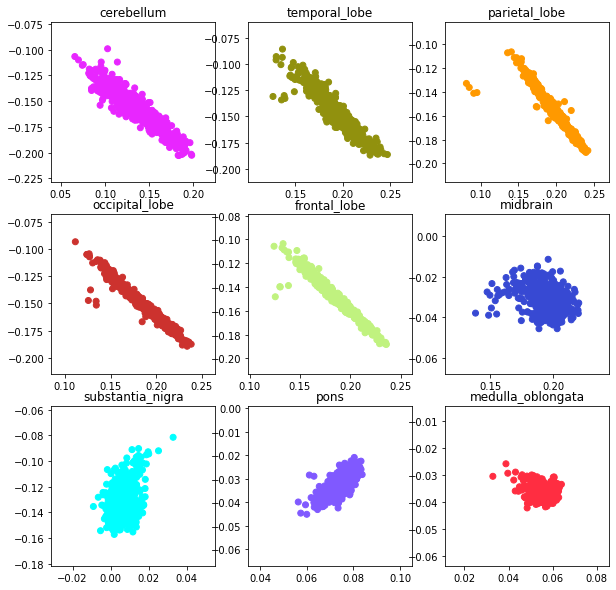

In [100]:
plt.figure(figsize=(10,10))

for i, region in enumerate(regions):
    plt.subplot(3, 3, i+1)
    
    df = leaf_vectors[leaf_vectors["node_id"].isin([str(i) for i in common_nodes])]
    df = df[df['layer_id'] == region]
    
    plt.scatter(df["d0"], 
            df["d1"], 
            c= df['layer_color'])
    plt.title(region)

plt.savefig(output_dir + "/common_nodes.png")
plt.show()

In [3]:
set([1,1,2,3])

{1, 2, 3}